Testing audio codes


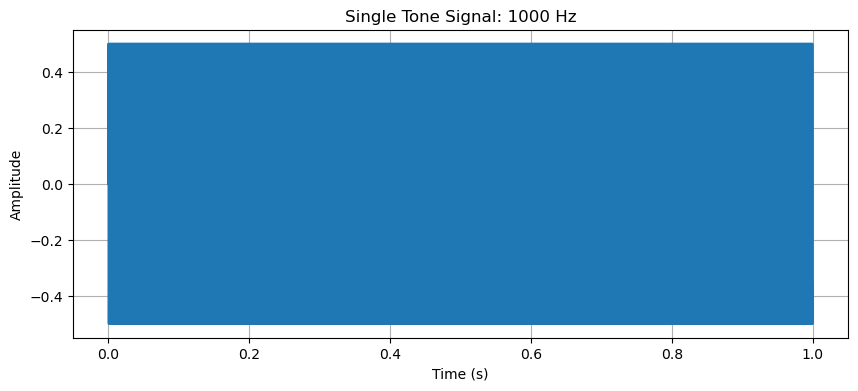

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Constants
sampling_rate = 8000  # Hz
duration = 1.0  # seconds
frequency = 1000  # Hz
amplitude = 0.5

# Generate the time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the single tone signal
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title(f"Single Tone Signal: {frequency} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Show the plot
plt.show()

# Playback the signal using sounddevice
sd.play(signal, sampling_rate)
sd.wait()


Line Collection

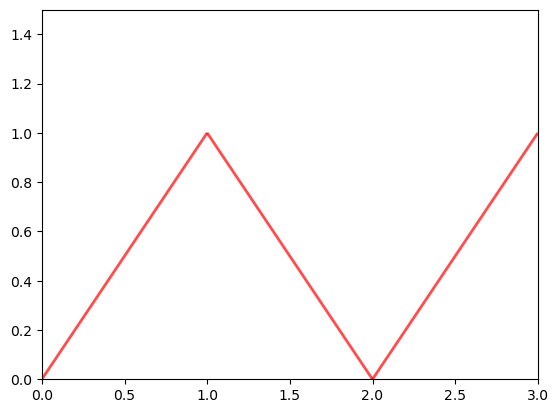

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Define line segment data
lines = [((0, 0), (1, 1)), ((1, 1), (2, 0)), ((2, 0), (3, 1))]

# Create a LineCollection
lc = LineCollection(lines, color='red', linewidth=2, alpha=0.7)

# Create a figure and axes
fig, ax = plt.subplots()

# Add the LineCollection to the axes
ax.add_collection(lc)

# Set axis limits
ax.set_xlim(0, 3)
ax.set_ylim(0, 1.5)

# Display the plot
plt.show()
